# South Korea COVID-19 Data

In [2]:
import os
import sys

from IPython.display import IFrame
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.patches as patches
import warnings
import networkx as nx
import osmnx as ox
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
import datetime

import urllib
import zipfile
import glob


Bad key "text.kerning_factor" on line 4 in
C:\Users\dun4g\anaconda3\envs\GIS\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


# Importing the South Korea data (excel) in the Data directory

In [4]:
# Read 
kor_cov19_df = pd.read_excel('C:/Users/dun4g/OneDrive/Documents/GitHub/COVID-19_Response_Comparison/Data/input/covid_19_south_korea_full_no_airport_xls.xlsx',
                            sheet_name='covid_19_daily_country')

kor_cov19_df.fillna(0, inplace=True)

In [5]:
kor_cov19_df

,Date,Country,Confirm_New,Confirm_Tot,Death_New,Death_Tot,Test_New,Test_Tot,Test_Curr
0,2020-01-20,South Korea,1,1,0,0,4,4,0
1,2020-01-24,South Korea,1,2,0,0,23,27,0
2,2020-01-26,South Korea,1,3,0,0,24,51,1
3,2020-01-27,South Korea,1,4,0,0,10,61,1
4,2020-01-28,South Korea,0,4,0,0,55,116,15
...,...,...,...,...,...,...,...,...,...
103,2020-05-06,South Korea,4,10810,1,256,6293,649388,8429
104,2020-05-07,South Korea,12,10822,0,256,5475,654863,8867
105,2020-05-08,South Korea,18,10840,0,256,5167,660030,9153
106,2020-05-09,South Korea,34,10874,0,256,3856,663886,10128


In [6]:
kor_cov19_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         108 non-null    datetime64[ns]
 1   Country      108 non-null    object        
 2   Confirm_New  108 non-null    int64         
 3   Confirm_Tot  108 non-null    int64         
 4   Death_New    108 non-null    int64         
 5   Death_Tot    108 non-null    int64         
 6   Test_New     108 non-null    int64         
 7   Test_Tot     108 non-null    int64         
 8   Test_Curr    108 non-null    int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 7.7+ KB


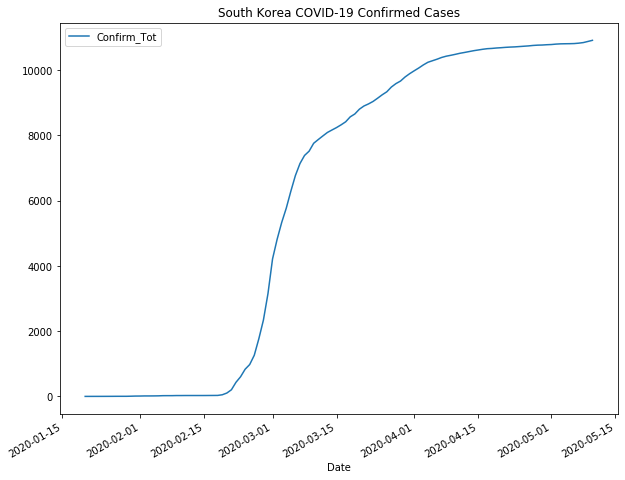

In [7]:
kor_cov19_df.plot(x='Date', 
                  y='Confirm_Tot',
                  kind='line',
                  title='South Korea COVID-19 Confirmed Cases',
                  figsize=(10, 8)
                 );

In [8]:
kor_cov19_confirm_tot = kor_cov19_df[['Date', 'Confirm_Tot']]

kor_cov19_confirm_tot

,Date,Confirm_Tot
0,2020-01-20,1
1,2020-01-24,2
2,2020-01-26,3
3,2020-01-27,4
4,2020-01-28,4
...,...,...
103,2020-05-06,10810
104,2020-05-07,10822
105,2020-05-08,10840
106,2020-05-09,10874


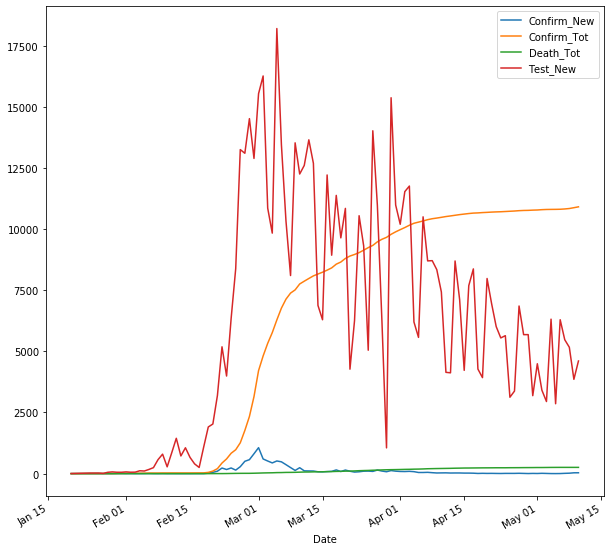

In [9]:
import matplotlib.dates as mdates

kor_cov19_confirm_tot = kor_cov19_df[['Date', 'Confirm_New', 'Confirm_Tot', 'Death_Tot', 'Test_New']]
kor_cov19_confirm_tot.set_index('Date', inplace=True)

# plot data
fig, ax = plt.subplots(figsize=(10, 10))
kor_cov19_confirm_tot.plot(ax=ax)

#set ticks every month
#ax.xaxis.set_major_locator(mdates.MonthLocator())

#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

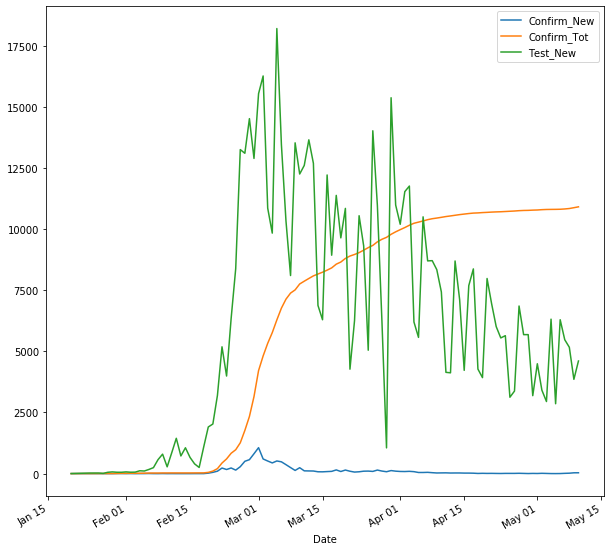

In [11]:
kor_cov19_confirm_tot = kor_cov19_df[['Date', 'Confirm_New', 'Confirm_Tot', 'Test_New']]
kor_cov19_confirm_tot.set_index('Date', inplace=True)

# plot data
fig, ax = plt.subplots(figsize=(10, 10))
kor_cov19_confirm_tot.plot(
    ax=ax
)

#set ticks every month
#ax.xaxis.set_major_locator(mdates.MonthLocator())

#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

In [ ]:
# # import matplotlib.ticker as mticker

# ax = kor_cov19_df['Confirm_Tot'].plot(kind='line', x=kor_cov19_df['Date'], stacked=True)

# # Make most of the ticklabels empty so the labels don't get too crowded
# ticklabels = ['']*len(kor_cov19_df.index)
# # Every 10th ticklable shows the month and day
# ticklabels[::10] = [item.strftime('%b %d') for item in kor_cov19_df['Date'].index[::10]]
# # Every 12th ticklabel includes the year
# # ticklabels[::12] = [item.strftime('%b %d\n%Y') for item in df_ts.index[::12]]
# ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
# plt.gcf().autofmt_xdate()

# plt.show()

# Importing the South Korea Province data (excel) in the Data directory

In [12]:
kor_cov19_province_now_df = pd.read_excel('C:/Users/dun4g/OneDrive/Documents/GitHub/COVID-19_Response_Comparison/Data/input/covid_19_south_korea_full_no_airport_xls.xlsx',
                            sheet_name='covid_19_update')

kor_cov19_province_now_df.fillna(0, inplace=True)

kor_cov19_province_now_df

,Date,Province,Confirm_New,Confirm_Tot,Death_New,Death_Tot,Test_New,Test_Tot,Test_Curr
0,2020-05-10,Seoul,20,683,0,2,3605.0,123889.0,5726.0
1,2020-05-10,Busan,0,141,0,3,0.0,0.0,0.0
2,2020-05-10,Daegu,0,6861,0,178,0.0,0.0,0.0
3,2020-05-10,Incheon,6,583,0,0,0.0,0.0,0.0
4,2020-05-10,Gwangju,0,30,0,0,0.0,0.0,0.0
5,2020-05-10,Daejeon,0,41,0,1,0.0,0.0,0.0
6,2020-05-10,Ulsan,0,44,0,1,0.0,0.0,0.0
7,2020-05-10,Sejong,1,47,0,0,0.0,0.0,0.0
8,2020-05-10,Gyeonggi-do,4,698,0,16,0.0,0.0,0.0
9,2020-05-10,Gangwon-do,1,54,0,2,0.0,0.0,0.0


In [13]:
kor_cov19_province_now_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         17 non-null     datetime64[ns]
 1   Province     17 non-null     object        
 2   Confirm_New  17 non-null     int64         
 3   Confirm_Tot  17 non-null     int64         
 4   Death_New    17 non-null     int64         
 5   Death_Tot    17 non-null     int64         
 6   Test_New     17 non-null     float64       
 7   Test_Tot     17 non-null     float64       
 8   Test_Curr    17 non-null     float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(1)
memory usage: 1.3+ KB


In [39]:
kor_update = kor_cov19_province_now_df.iloc[-1]['Date'].to_pydatetime()

kor_update

datetime.datetime(2020, 5, 10, 0, 0)

In [28]:
import datetime
today_date = datetime.datetime.now()
today_date

datetime.datetime(2020, 5, 11, 3, 14, 31, 244344)

In [37]:
kor_cov19_province_df = pd.read_excel('C:/Users/dun4g/OneDrive/Documents/GitHub/COVID-19_Response_Comparison/Data/input/covid_19_south_korea_full_no_airport_xls.xlsx',
                                  sheet_name='covid_19_daily_province')

kor_cov19_province_df

,Date,Province,Confirm_New,Confirm_Tot,Confirm_Acc,Death_New,Death_Tot,Test_New,Test_Tot,Test_Curr
0,2020-01-20 00:00:00,Incheon,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
1,2020-01-24 00:00:00,Seoul,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN
2,2020-01-26 00:00:00,Gyeonggi-do,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN
3,2020-01-27 00:00:00,Gyeonggi-do,1.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN
4,2020-01-30 00:00:00,Seoul,3.0,4.0,7.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
677,2020-05-01 00:00:00,Airport,3.0,NaN,10778.0,NaN,NaN,NaN,NaN,NaN
678,2020-05-02 00:00:00,Seoul,2.0,NaN,10779.0,NaN,NaN,NaN,NaN,NaN
679,2020-05-02 00:00:00,Daegu,4.0,NaN,10780.0,NaN,NaN,NaN,NaN,NaN
680,2020-05-02 00:00:00,Gyeonggi-do,2.0,NaN,10781.0,NaN,NaN,NaN,NaN,NaN


In [38]:
kor_cov19_province_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         682 non-null    object 
 1   Province     682 non-null    object 
 2   Confirm_New  663 non-null    float64
 3   Confirm_Tot  84 non-null     float64
 4   Confirm_Acc  672 non-null    float64
 5   Death_New    105 non-null    float64
 6   Death_Tot    105 non-null    float64
 7   Test_New     48 non-null     float64
 8   Test_Tot     65 non-null     object 
 9   Test_Curr    66 non-null     float64
dtypes: float64(7), object(3)
memory usage: 53.4+ KB


In [41]:
kor_cov19_province_df['Date']=pd.to_datetime(kor_cov19_province_df['Date'])
# kor_cov19_province_df['Date'].apply(pd.to_datetime) didn't work

In [42]:
kor_cov19_province_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         682 non-null    datetime64[ns]
 1   Province     682 non-null    object        
 2   Confirm_New  663 non-null    float64       
 3   Confirm_Tot  84 non-null     float64       
 4   Confirm_Acc  672 non-null    float64       
 5   Death_New    105 non-null    float64       
 6   Death_Tot    105 non-null    float64       
 7   Test_New     48 non-null     float64       
 8   Test_Tot     65 non-null     object        
 9   Test_Curr    66 non-null     float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 53.4+ KB


In [43]:
kor_cov19_province_df.fillna(0)

,Date,Province,Confirm_New,Confirm_Tot,Confirm_Acc,Death_New,Death_Tot,Test_New,Test_Tot,Test_Curr
0,2020-01-20,Incheon,1.0,1.0,1.0,0.0,0.0,0.0,0,0.0
1,2020-01-24,Seoul,1.0,1.0,2.0,0.0,0.0,0.0,0,0.0
2,2020-01-26,Gyeonggi-do,1.0,1.0,3.0,0.0,0.0,0.0,0,0.0
3,2020-01-27,Gyeonggi-do,1.0,2.0,4.0,0.0,0.0,0.0,0,0.0
4,2020-01-30,Seoul,3.0,4.0,7.0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
677,2020-05-01,Airport,3.0,0.0,10778.0,0.0,0.0,0.0,0,0.0
678,2020-05-02,Seoul,2.0,0.0,10779.0,0.0,0.0,0.0,0,0.0
679,2020-05-02,Daegu,4.0,0.0,10780.0,0.0,0.0,0.0,0,0.0
680,2020-05-02,Gyeonggi-do,2.0,0.0,10781.0,0.0,0.0,0.0,0,0.0


# Now let's merge it with South Korea Geodata